## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  83.163320   384.443085  0.067905  6.635435  0.382879
1  91.184084   636.996292  0.627750  4.595170  1.423425
2  21.584183  1084.270137  0.936237  7.634715  1.584516
3  94.819817  1449.861582  0.560342  3.887332  1.351548
4  92.692593   596.731997  0.541545  1.164444  1.135315


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.18905 | train_mse: 5.34286 | train_mae: 1.77663 |  0:00:00s
epoch 1  | loss: 0.82206 | train_mse: 3.50166 | train_mae: 1.39462 |  0:00:00s


epoch 2  | loss: 0.71341 | train_mse: 4.51289 | train_mae: 1.7522  |  0:00:00s
epoch 3  | loss: 0.50043 | train_mse: 4.75819 | train_mae: 1.73065 |  0:00:00s
epoch 4  | loss: 0.53439 | train_mse: 2.82594 | train_mae: 1.29644 |  0:00:00s


epoch 5  | loss: 0.85499 | train_mse: 1.3501  | train_mae: 0.89117 |  0:00:00s
epoch 6  | loss: 0.48357 | train_mse: 1.36795 | train_mae: 0.88716 |  0:00:01s


epoch 7  | loss: 0.44401 | train_mse: 1.56417 | train_mae: 0.88234 |  0:00:01s


epoch 8  | loss: 0.43016 | train_mse: 1.4496  | train_mae: 0.82602 |  0:00:01s
epoch 9  | loss: 0.5291  | train_mse: 1.677   | train_mae: 0.89472 |  0:00:01s


epoch 10 | loss: 0.31207 | train_mse: 0.77677 | train_mae: 0.64035 |  0:00:01s
epoch 11 | loss: 0.35333 | train_mse: 0.47636 | train_mae: 0.51044 |  0:00:01s


epoch 12 | loss: 0.33869 | train_mse: 0.58827 | train_mae: 0.54906 |  0:00:01s
epoch 13 | loss: 0.36761 | train_mse: 0.79681 | train_mae: 0.603   |  0:00:01s
epoch 14 | loss: 0.30725 | train_mse: 0.76256 | train_mae: 0.59888 |  0:00:02s


epoch 15 | loss: 0.22193 | train_mse: 0.27731 | train_mae: 0.39423 |  0:00:02s
epoch 16 | loss: 0.2114  | train_mse: 0.22199 | train_mae: 0.35731 |  0:00:02s


epoch 17 | loss: 0.23019 | train_mse: 0.24287 | train_mae: 0.36193 |  0:00:02s
epoch 18 | loss: 0.26341 | train_mse: 0.27593 | train_mae: 0.37763 |  0:00:02s
epoch 19 | loss: 0.30892 | train_mse: 0.21461 | train_mae: 0.35686 |  0:00:02s


epoch 20 | loss: 0.1753  | train_mse: 0.22441 | train_mae: 0.36214 |  0:00:02s
epoch 21 | loss: 0.21044 | train_mse: 0.24065 | train_mae: 0.35202 |  0:00:02s
epoch 22 | loss: 0.24318 | train_mse: 0.2107  | train_mae: 0.32785 |  0:00:02s


epoch 23 | loss: 0.27109 | train_mse: 0.1635  | train_mae: 0.30076 |  0:00:02s
epoch 24 | loss: 0.20155 | train_mse: 0.16058 | train_mae: 0.29823 |  0:00:03s


epoch 25 | loss: 0.29244 | train_mse: 0.14703 | train_mae: 0.28744 |  0:00:03s
epoch 26 | loss: 0.43953 | train_mse: 0.24174 | train_mae: 0.33588 |  0:00:03s


epoch 27 | loss: 0.24404 | train_mse: 0.23937 | train_mae: 0.36338 |  0:00:03s
epoch 28 | loss: 0.21385 | train_mse: 0.12417 | train_mae: 0.28343 |  0:00:03s
epoch 29 | loss: 0.14913 | train_mse: 0.16426 | train_mae: 0.30538 |  0:00:03s


epoch 30 | loss: 0.24527 | train_mse: 0.24814 | train_mae: 0.36795 |  0:00:03s
epoch 31 | loss: 0.20069 | train_mse: 0.2128  | train_mae: 0.34288 |  0:00:03s
epoch 32 | loss: 0.23886 | train_mse: 0.10223 | train_mae: 0.25498 |  0:00:03s


epoch 33 | loss: 0.19246 | train_mse: 0.08444 | train_mae: 0.23081 |  0:00:04s
epoch 34 | loss: 0.1472  | train_mse: 0.10176 | train_mae: 0.25099 |  0:00:04s


epoch 35 | loss: 0.28226 | train_mse: 0.23773 | train_mae: 0.34536 |  0:00:04s
epoch 36 | loss: 0.19167 | train_mse: 0.3425  | train_mae: 0.39323 |  0:00:04s


epoch 37 | loss: 0.24234 | train_mse: 0.32702 | train_mae: 0.37699 |  0:00:04s
epoch 38 | loss: 0.17116 | train_mse: 0.17259 | train_mae: 0.28579 |  0:00:04s


epoch 39 | loss: 0.16483 | train_mse: 0.10289 | train_mae: 0.25358 |  0:00:04s
epoch 40 | loss: 0.11479 | train_mse: 0.0905  | train_mae: 0.23239 |  0:00:04s
epoch 41 | loss: 0.11807 | train_mse: 0.11881 | train_mae: 0.25441 |  0:00:04s


epoch 42 | loss: 0.19281 | train_mse: 0.09857 | train_mae: 0.24828 |  0:00:05s
epoch 43 | loss: 0.09351 | train_mse: 0.11127 | train_mae: 0.2698  |  0:00:05s


epoch 44 | loss: 0.19901 | train_mse: 0.15112 | train_mae: 0.30978 |  0:00:05s
epoch 45 | loss: 0.11687 | train_mse: 0.14136 | train_mae: 0.28645 |  0:00:05s


epoch 46 | loss: 0.16888 | train_mse: 0.09806 | train_mae: 0.25243 |  0:00:05s
epoch 47 | loss: 0.18345 | train_mse: 0.16845 | train_mae: 0.29529 |  0:00:05s
epoch 48 | loss: 0.24975 | train_mse: 0.18003 | train_mae: 0.30182 |  0:00:05s


epoch 49 | loss: 0.12901 | train_mse: 0.10174 | train_mae: 0.23666 |  0:00:05s
epoch 50 | loss: 0.09481 | train_mse: 0.06656 | train_mae: 0.19995 |  0:00:05s
epoch 51 | loss: 0.08996 | train_mse: 0.08896 | train_mae: 0.23031 |  0:00:05s


epoch 52 | loss: 0.22604 | train_mse: 0.07613 | train_mae: 0.21312 |  0:00:06s
epoch 53 | loss: 0.14859 | train_mse: 0.06499 | train_mae: 0.20493 |  0:00:06s


epoch 54 | loss: 0.12215 | train_mse: 0.09175 | train_mae: 0.23006 |  0:00:06s
epoch 55 | loss: 0.15284 | train_mse: 0.09323 | train_mae: 0.23601 |  0:00:06s
epoch 56 | loss: 0.39715 | train_mse: 0.13392 | train_mae: 0.2727  |  0:00:06s


epoch 57 | loss: 0.10989 | train_mse: 0.07803 | train_mae: 0.2147  |  0:00:06s
epoch 58 | loss: 0.12261 | train_mse: 0.07619 | train_mae: 0.21438 |  0:00:06s
epoch 59 | loss: 0.0822  | train_mse: 0.083   | train_mae: 0.22346 |  0:00:06s


epoch 60 | loss: 0.17985 | train_mse: 0.06659 | train_mae: 0.20724 |  0:00:06s
epoch 61 | loss: 0.13047 | train_mse: 0.05769 | train_mae: 0.193   |  0:00:06s
epoch 62 | loss: 0.10262 | train_mse: 0.0726  | train_mae: 0.22498 |  0:00:07s


epoch 63 | loss: 0.09953 | train_mse: 0.10275 | train_mae: 0.23993 |  0:00:07s
epoch 64 | loss: 0.16636 | train_mse: 0.11136 | train_mae: 0.23903 |  0:00:07s


epoch 65 | loss: 0.13872 | train_mse: 0.10992 | train_mae: 0.241   |  0:00:07s
epoch 66 | loss: 0.23672 | train_mse: 0.08632 | train_mae: 0.2293  |  0:00:07s
epoch 67 | loss: 0.15217 | train_mse: 0.09812 | train_mae: 0.24793 |  0:00:07s


epoch 68 | loss: 0.12603 | train_mse: 0.09062 | train_mae: 0.23565 |  0:00:07s
epoch 69 | loss: 0.1435  | train_mse: 0.11617 | train_mae: 0.26226 |  0:00:07s
epoch 70 | loss: 0.11851 | train_mse: 0.12846 | train_mae: 0.27259 |  0:00:07s


epoch 71 | loss: 0.11893 | train_mse: 0.13251 | train_mae: 0.28218 |  0:00:07s
epoch 72 | loss: 0.18834 | train_mse: 0.12051 | train_mae: 0.26874 |  0:00:08s


epoch 73 | loss: 0.18836 | train_mse: 0.11986 | train_mae: 0.2677  |  0:00:08s
epoch 74 | loss: 0.27197 | train_mse: 0.12137 | train_mae: 0.26829 |  0:00:08s


epoch 75 | loss: 0.14455 | train_mse: 0.17436 | train_mae: 0.31062 |  0:00:08s
epoch 76 | loss: 0.18586 | train_mse: 0.22656 | train_mae: 0.3421  |  0:00:08s
epoch 77 | loss: 0.19888 | train_mse: 0.31652 | train_mae: 0.37772 |  0:00:08s


epoch 78 | loss: 0.31551 | train_mse: 0.44271 | train_mae: 0.42209 |  0:00:08s
epoch 79 | loss: 0.20676 | train_mse: 0.49706 | train_mae: 0.44972 |  0:00:08s


epoch 80 | loss: 0.18201 | train_mse: 0.49077 | train_mae: 0.42652 |  0:00:08s
epoch 81 | loss: 0.21259 | train_mse: 0.45231 | train_mae: 0.41299 |  0:00:09s


epoch 82 | loss: 0.27961 | train_mse: 0.38975 | train_mae: 0.39282 |  0:00:09s
epoch 83 | loss: 0.26936 | train_mse: 0.31004 | train_mae: 0.36664 |  0:00:09s
epoch 84 | loss: 0.17959 | train_mse: 0.23618 | train_mae: 0.33204 |  0:00:09s


epoch 85 | loss: 0.17247 | train_mse: 0.1864  | train_mae: 0.29764 |  0:00:09s
epoch 86 | loss: 0.11636 | train_mse: 0.13408 | train_mae: 0.27067 |  0:00:09s


epoch 87 | loss: 0.26878 | train_mse: 0.09298 | train_mae: 0.2307  |  0:00:09s
epoch 88 | loss: 0.11234 | train_mse: 0.08064 | train_mae: 0.2109  |  0:00:09s
epoch 89 | loss: 0.28285 | train_mse: 0.07924 | train_mae: 0.21018 |  0:00:09s


epoch 90 | loss: 0.19968 | train_mse: 0.0898  | train_mae: 0.23017 |  0:00:09s
epoch 91 | loss: 0.34942 | train_mse: 0.13848 | train_mae: 0.27395 |  0:00:09s
epoch 92 | loss: 0.17973 | train_mse: 0.13704 | train_mae: 0.27276 |  0:00:10s


epoch 93 | loss: 0.11476 | train_mse: 0.12302 | train_mae: 0.25874 |  0:00:10s
epoch 94 | loss: 0.16182 | train_mse: 0.13064 | train_mae: 0.25535 |  0:00:10s
epoch 95 | loss: 0.14393 | train_mse: 0.10894 | train_mae: 0.23863 |  0:00:10s


epoch 96 | loss: 0.1306  | train_mse: 0.10196 | train_mae: 0.23739 |  0:00:10s
epoch 97 | loss: 0.10235 | train_mse: 0.10984 | train_mae: 0.23649 |  0:00:10s
epoch 98 | loss: 0.42117 | train_mse: 0.22747 | train_mae: 0.30285 |  0:00:10s


epoch 99 | loss: 0.32767 | train_mse: 0.32242 | train_mae: 0.35107 |  0:00:10s
epoch 100| loss: 0.14784 | train_mse: 0.30256 | train_mae: 0.34703 |  0:00:10s
epoch 101| loss: 0.11854 | train_mse: 0.1888  | train_mae: 0.30522 |  0:00:10s


epoch 102| loss: 0.11292 | train_mse: 0.11102 | train_mae: 0.24814 |  0:00:10s
epoch 103| loss: 0.10405 | train_mse: 0.09154 | train_mae: 0.22649 |  0:00:11s
epoch 104| loss: 0.12279 | train_mse: 0.08239 | train_mae: 0.2178  |  0:00:11s


epoch 105| loss: 0.10484 | train_mse: 0.0931  | train_mae: 0.23028 |  0:00:11s
epoch 106| loss: 0.17271 | train_mse: 0.09449 | train_mae: 0.22766 |  0:00:11s


epoch 107| loss: 0.09482 | train_mse: 0.08975 | train_mae: 0.22168 |  0:00:11s
epoch 108| loss: 0.1746  | train_mse: 0.1025  | train_mae: 0.2367  |  0:00:11s
epoch 109| loss: 0.11081 | train_mse: 0.10982 | train_mae: 0.24493 |  0:00:11s


epoch 110| loss: 0.22102 | train_mse: 0.10373 | train_mae: 0.23763 |  0:00:11s
epoch 111| loss: 0.26307 | train_mse: 0.12049 | train_mae: 0.24604 |  0:00:11s

Early stopping occurred at epoch 111 with best_epoch = 61 and best_train_mae = 0.193
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

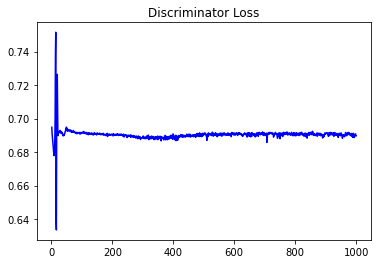

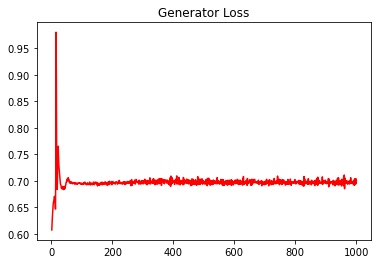

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2307980676873666


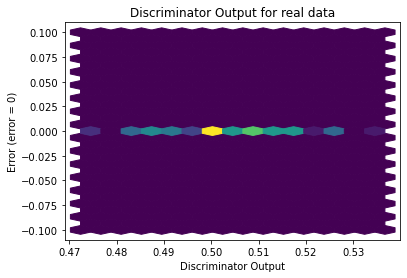

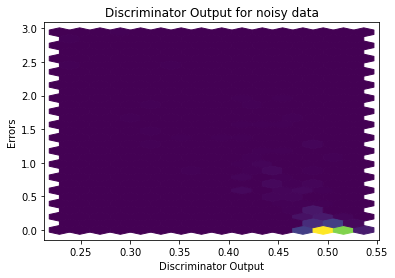

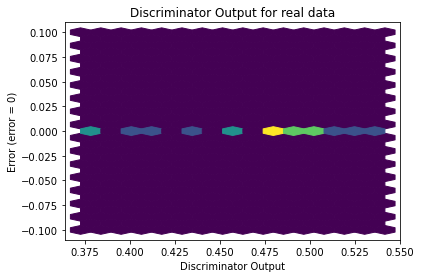

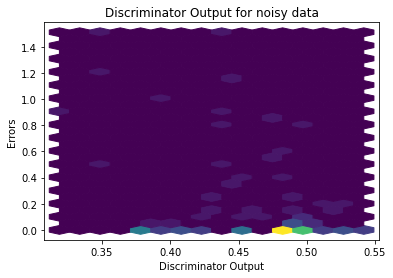

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


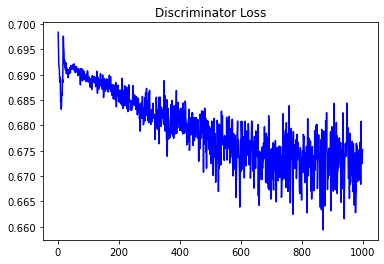

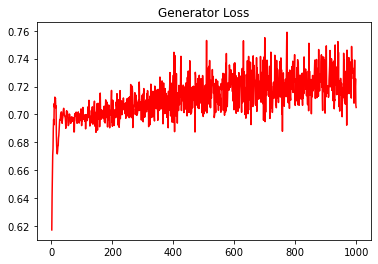

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20142646248911228


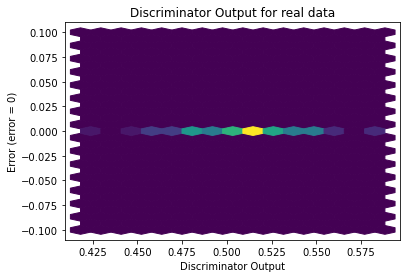

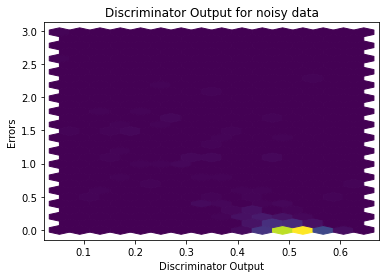

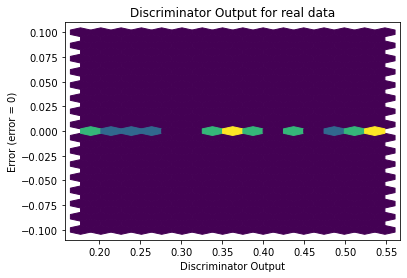

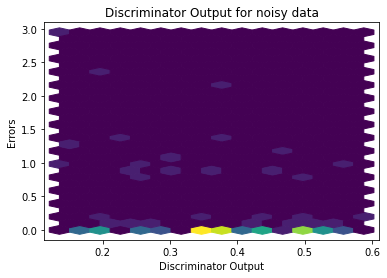

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1734]], requires_grad=True)
